__CRISP DM__
* [x] Business Understanding
* [x] Data Import and Understanding
* [x] Data Preparation
* [ ] Modelling
* [ ] Evaluation
* [ ] Deployment

## Data Import and Understanding

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('./datasets/fashion-mnist/fashion-mnist_train.csv')
test = pd.read_csv('./datasets/fashion-mnist/fashion-mnist_test.csv')

train.shape, test.shape

((60000, 785), (10000, 785))

In [3]:
x_train = train.drop('label', axis=1)
y_train = train['label']
x_test = test.drop('label', axis=1)
y_test = test['label']

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [4]:
label_to_class = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot',}
label_to_class

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

C:\Users\balijepallikumar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

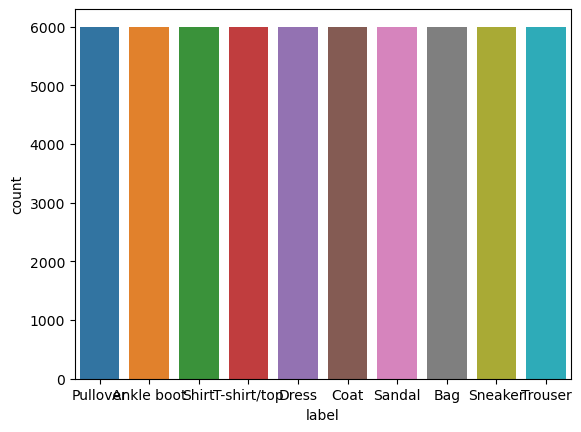

In [5]:
sns.countplot(y_train.replace(label_to_class))

In [6]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 358.9 MB


In [7]:
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Preparation

In [8]:
x_train = np.array(x_train).reshape(60000, 28, 28).copy()
x_test = np.array(x_test).reshape(10000, 28, 28).copy()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
side = x_train.shape[1]
n_classes = len(y_train.unique())

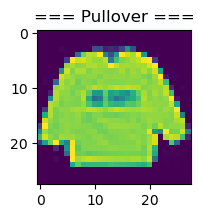

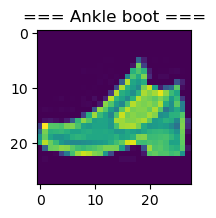

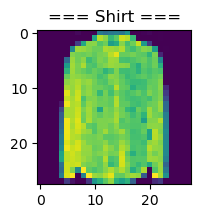

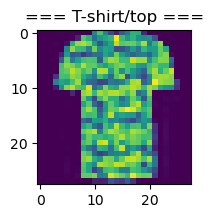

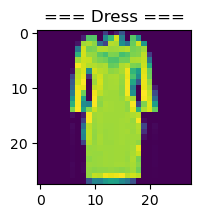

In [10]:
for i in range(5):
    plt.figure(figsize=(2,2))
    plt.title(f"=== {label_to_class[y_train[i]]} ===")
    plt.imshow(x_train[i])

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, shuffle=True, random_state=42)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((54000, 28, 28), (6000, 28, 28), (54000,), (6000,))

In [12]:
x_train = x_train.reshape(x_train.shape[0], side**2).copy()
x_val = x_val.reshape(x_val.shape[0], side**2).copy()
x_test = x_test.reshape(x_test.shape[0], side**2).copy()

x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((54000, 784), (6000, 784), (10000, 784), (54000,), (6000,), (10000,))

In [13]:
def make_onehot(labels, n_classes):
    return np.array([[(i==j)*1 for i in range(n_classes)] for j in labels])

y_train = make_onehot(y_train, n_classes)
y_val = make_onehot(y_val, n_classes)
y_test = make_onehot(y_test, n_classes)

y_train.shape, y_val.shape, y_test.shape

((54000, 10), (6000, 10), (10000, 10))

## Modelling

In [14]:
scores = {}

#### Deep Learning Model

In [15]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback

In [16]:
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs['accuracy'] > 0.9:
            print("Accuracy is greater than 0.9")
            self.model.stop_training = True

In [17]:
dnn_model = Sequential([
    Dense(256, activation='relu', input_shape=[784]),
    Dropout(0.1),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(10, activation='softmax')
])

In [18]:
from tensorflow.keras.optimizers import Adam
lr = 0.001
epochs = 50
batch_size = 128
dnn_model.compile(optimizer=Adam(lr), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [20]:
dnn_model.fit(
    x_train, 
    y_train, 
    validation_data = (x_val, y_val), 
    epochs = epochs,
    batch_size=batch_size,
    callbacks=[MyCallback()],
    shuffle = True)

Epoch 1/50
422/422 [==============================] - 9s 14ms/step - loss: 2.7195 - accuracy: 0.2636 - val_loss: 1.2816 - val_accuracy: 0.5783
Epoch 2/50
422/422 [==============================] - 4s 9ms/step - loss: 1.2823 - accuracy: 0.5545 - val_loss: 0.9988 - val_accuracy: 0.6350
Epoch 3/50
422/422 [==============================] - 3s 6ms/step - loss: 1.0476 - accuracy: 0.6050 - val_loss: 0.8997 - val_accuracy: 0.6463
Epoch 4/50
422/422 [==============================] - 4s 9ms/step - loss: 0.9542 - accuracy: 0.6290 - val_loss: 0.7594 - val_accuracy: 0.7448
Epoch 5/50
422/422 [==============================] - 5s 12ms/step - loss: 0.7690 - accuracy: 0.7181 - val_loss: 0.5686 - val_accuracy: 0.8093
Epoch 6/50
422/422 [==============================] - 5s 12ms/step - loss: 0.6517 - accuracy: 0.7652 - val_loss: 0.4876 - val_accuracy: 0.8250
Epoch 7/50
422/422 [==============================] - 5s 11ms/step - loss: 0.5897 - accuracy: 0.7914 - val_loss: 0.4459 - val_accuracy: 0.8408
Ep

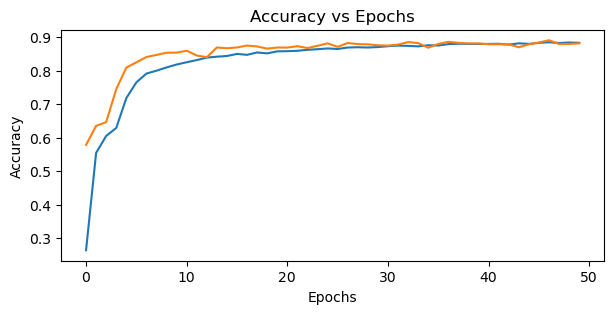

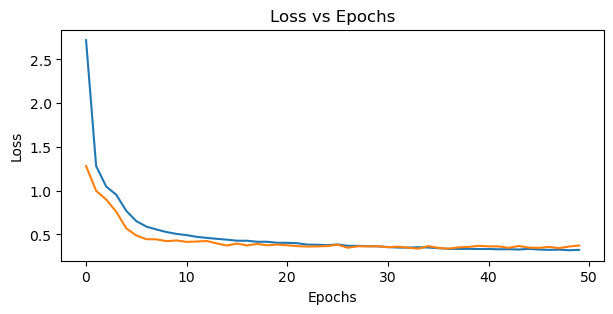

In [21]:
dnn_history = dnn_model.history.history

plt.figure(figsize=(7,3))
plt.title(f'Accuracy vs Epochs')
plt.xlabel(f'Epochs')
plt.ylabel(f'Accuracy')
plt.plot(dnn_model.history.history['accuracy'])
plt.plot(dnn_model.history.history['val_accuracy'])

plt.figure(figsize=(7,3))
plt.title(f'Loss vs Epochs')
plt.xlabel(f'Epochs')
plt.ylabel(f'Loss')
plt.plot(dnn_model.history.history['loss'])
plt.plot(dnn_model.history.history['val_loss'])

In [22]:
scores['DNN'] = dnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3853 - accuracy: 0.8747


#### Convolutional Network

In [23]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

In [24]:
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs['accuracy'] > 0.98:
            print("Accuracy is greater than 0.9")
            self.model.stop_training = True

In [25]:
cnn_model = Sequential([
    Conv2D(64, 3, activation='relu', input_shape=(28,28,1)),
    MaxPool2D((2, 2)),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(16, 3, activation='relu'),
    MaxPool2D((2, 2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dropout(0.1),
    Dense(10, activation='softmax')
])

In [26]:
from tensorflow.keras.optimizers import Adam
lr = 0.001
epochs = 50
batch_size = 128
cnn_model.compile(optimizer=Adam(lr), loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 16)          4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 16)        

In [28]:
x_train = x_train.reshape(x_train.shape[0], 28, 28).copy()
x_val = x_val.reshape(x_val.shape[0], 28, 28).copy()
x_test = x_test.reshape(x_test.shape[0], 28, 28).copy()

x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((54000, 28, 28),
 (6000, 28, 28),
 (10000, 28, 28),
 (54000, 10),
 (6000, 10),
 (10000, 10))

In [29]:
cnn_model.fit(
    x_train, 
    y_train, 
    validation_data = (x_val, y_val), 
    epochs = epochs,
    batch_size=batch_size,
    shuffle = True,
    callbacks=MyCallback())

Epoch 1/50
422/422 [==============================] - 42s 92ms/step - loss: 1.1576 - accuracy: 0.5950 - val_loss: 0.6201 - val_accuracy: 0.7642
Epoch 2/50
422/422 [==============================] - 36s 85ms/step - loss: 0.6834 - accuracy: 0.7524 - val_loss: 0.5461 - val_accuracy: 0.7967
Epoch 3/50
422/422 [==============================] - 35s 82ms/step - loss: 0.5764 - accuracy: 0.7925 - val_loss: 0.4890 - val_accuracy: 0.8142
Epoch 4/50
422/422 [==============================] - 35s 83ms/step - loss: 0.5304 - accuracy: 0.8104 - val_loss: 0.4567 - val_accuracy: 0.8293
Epoch 5/50
422/422 [==============================] - 44s 105ms/step - loss: 0.4929 - accuracy: 0.8215 - val_loss: 0.4492 - val_accuracy: 0.8323
Epoch 6/50
422/422 [==============================] - 44s 103ms/step - loss: 0.4728 - accuracy: 0.8281 - val_loss: 0.4271 - val_accuracy: 0.8413
Epoch 7/50
422/422 [==============================] - 43s 101ms/step - loss: 0.4455 - accuracy: 0.8384 - val_loss: 0.4115 - val_accura

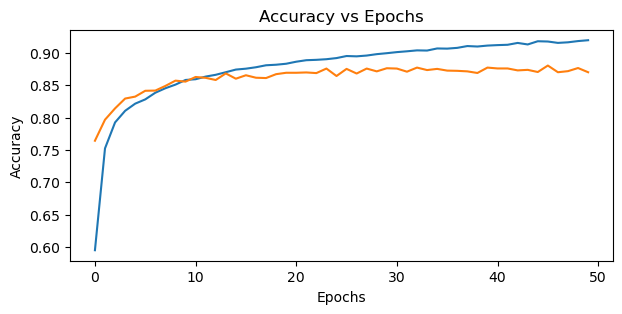

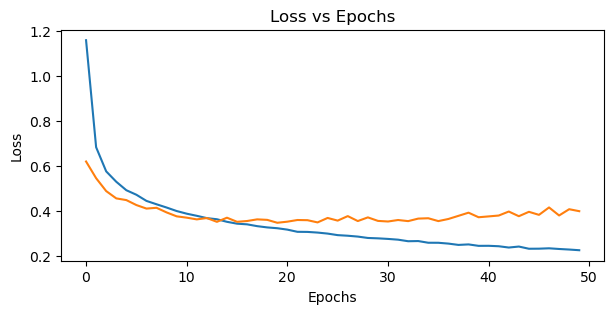

In [30]:
cnn_history = cnn_model.history.history

plt.figure(figsize=(7,3))
plt.title(f'Accuracy vs Epochs')
plt.xlabel(f'Epochs')
plt.ylabel(f'Accuracy')
plt.plot(cnn_model.history.history['accuracy'])
plt.plot(cnn_model.history.history['val_accuracy'])

plt.figure(figsize=(7,3))
plt.title(f'Loss vs Epochs')
plt.xlabel(f'Epochs')
plt.ylabel(f'Loss')
plt.plot(cnn_model.history.history['loss'])
plt.plot(cnn_model.history.history['val_loss'])

In [31]:
scores['CNN'] = cnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.4210 - accuracy: 0.8774


In [41]:
# scores = pd.DataFrame(scores[['DNN', 'CNN']]).T
scores.columns = ['loss', 'accuracy']
scores

,loss,accuracy
DNN,0.385253,0.8747
CNN,0.421022,0.8774
